# PCA降维过程印证

顾名思义，主成分分析是找出主要成分来代替原来数据。
用二维平面上的例子来简要说明其过程，如图下图所示。
在二维平面上有X1,X2,X3,X4四个点，坐标分别是（4，2）,（0，2）,（-2，0）和（-2，-4），它们满足所谓中心化要求，
即∑4(i=1) = 1Xi = 0。
对于不满足中心化要求的点，可通过减所有点的均值来满足该要求。

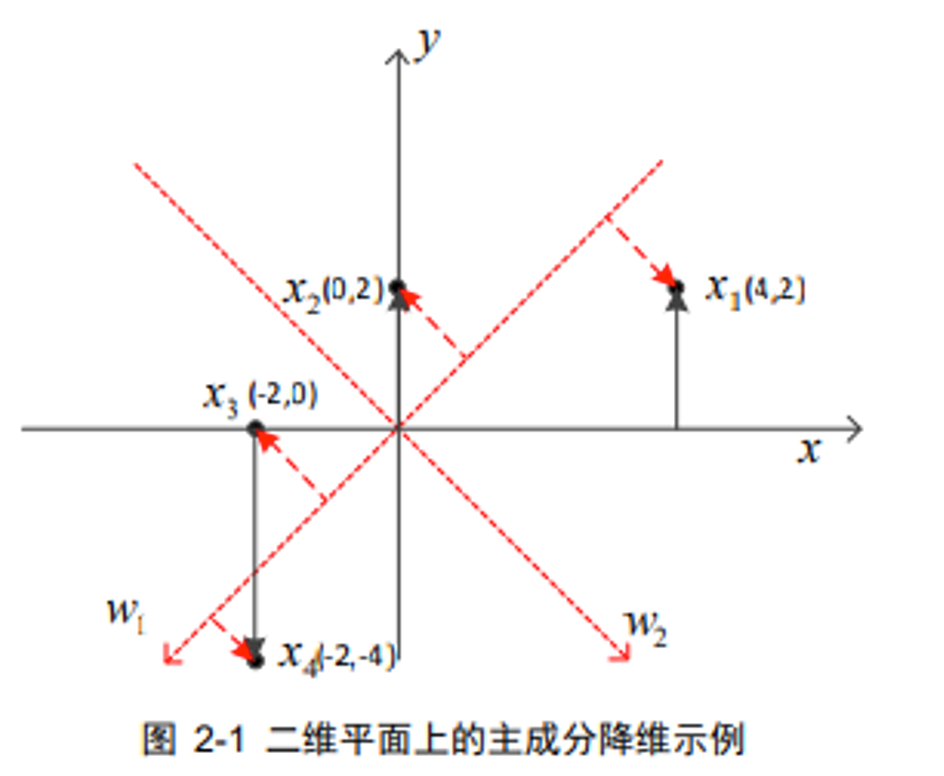

现在要将这四个点从二维降为一维，怎么降呢？一个很自然的想法是直接去掉每个点的一个坐标比如，去掉y轴上的坐标，只保留x轴上的坐标。
这实际上是用各点在x轴上的投影来代替原来的点，带来的误差为它们在y轴上的投影向量，如图中从x轴指向各点的带箭头实线所示，其中X3点在x轴上，因此没有误差向量。
降维必定会带来误差，如何使总体误差最小是降维算法追求的目标。用所有误差向量的模的平方之和作为损失函数来衡量降维带来的误差（类似于误差平方和损失函数SSE）试着同步旋转x和y轴，使得去掉y轴上的坐标带来的损失函数最小。
比如x和y坐标轴保持正交旋转到图中的W1和W2坐标轴，降维的结果是只保留各点在W1上的投影，放弃在W2上的投影，所带来的误差向量为图中带箭头的虚线所示。
<p>
在此例中，是从二维降到一维，即用点到线的投影来代替平面上的点。如果在三维立体空间中，可将空间中的点投影到一个平面上或者一条线上。进一步推广，可以将多维空间中的点投影到一个低维的超平面上。
在sklearn扩展库的decomposition模块中实现了PCA算法。先用它来印证上述分析过程，代码如下所示

In [6]:
# 平面上四个点的坐标
X = [[ 4, 2], [ 0, 2],
     [ -2, 0], [ -2, -4]]

from sklearn.decomposition import PCA

pca = PCA(n_components=2)#只旋转不降维 
pca.fit(X)
print("新的轴向量:")
print(pca. components_)
print("各维度投影方差占比分布:")
print(pca.explained_variance_ratio_)
print("各点在新轴上的投影:")
print(pca.transform(X))

新的轴向量:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
各维度投影方差占比分布:
[0.83333333 0.16666667]
各点在新轴上的投影:
[[ 4.24264069  1.41421356]
 [ 1.41421356 -1.41421356]
 [-1.41421356 -1.41421356]
 [-4.24264069  1.41421356]]


In [10]:
#降到一维
pca = PCA(n_components = 1)
pca.fit(X)
print("新的轴向量:")
print(pca. components_)
print("各维度投影方差占比分布:")
print(pca.explained_variance_ratio_)
print("各点在新轴上的投影:")
print(pca.transform(X))

新的轴向量:
[[0.70710678 0.70710678]]
各维度投影方差占比分布:
[0.83333333]
各点在新轴上的投影:
[[ 4.24264069]
 [ 1.41421356]
 [-1.41421356]
 [-4.24264069]]


第5行实例化PCA类，当把参数components设为与原特征数相同时，它只旋转不降维。
第6行是用四个点的坐标来训练算法。第8行通过属性 components输出旋转后的轴向量。
如第15、16行所示，第一个轴向量可以写成分数形式（-(1/√2),-(1/√2))，可见它的方向是x，y轴中间45度。
第12行用transform方法对四个点计算新的投影，如第20行到第23行所示。读者可以用几何知识验证一下。
第10行是通过属性 explained＿variance＿rai观察各维度投影方差的占比分布，可以理解为各维度的成分比例，它是按从大到小排列输出，属性 emponents输出的新轴向量排列顺序要与它对应。输出如第18行所示。
第25行将参数components设为1，即降到一维。对比第14行的输出和第34行的输出，可以看到，它是将第二个轴上的新投影直接丢弃了，保留了主要成分。

# PCA 高维数据降维应用

下面来看一个可视化降维高维特征的示例。为了方便对比观察，不采用过高维的数据，而只用三维的数据示例，具体流程是先生成三维空间中分布的点，然后降到二维，观察并分析其过程。在三维空间中生成四个簇，并察看它们的分布，见下面的代码。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

##### 在三维空间中产生四个簇,共1000个样本

/Users/zhboat/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


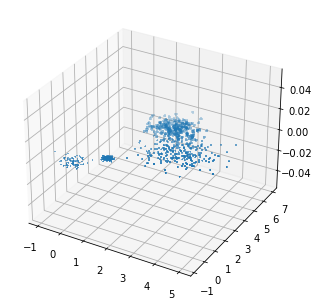

In [11]:
x, _= make_blobs(n_samples = 1000,n_features=3,
               centers = [[0,0,0],[1,1,0.5],
                          [3,3,3],[2,5,10]],
               cluster_std = [0.3,0.1,0.7,0.5])
fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(x[:,0],x[:,1],x[:,2], marker='+')

__在三个面的投影__

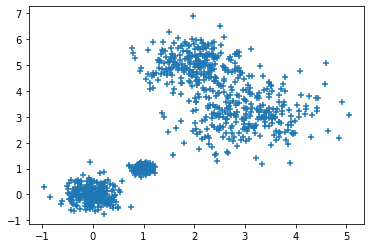

In [12]:
plt.scatter(x[:,0], x[:,1], marker = '+')
plt.show()

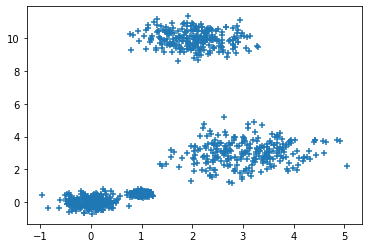

In [13]:
plt.scatter(x[:,0], x[:,2], marker = '+')
plt.show()

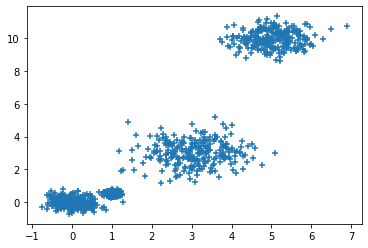

In [14]:
plt.scatter(x[:,1], x[:,2], marker = '+')
plt.show()

sklearn扩展库的datasets模块中的Make_blobs()函数产生各向同性的高斯分布（即常说的正态分布）的样本数据。
本例中，用它在三维空间中以指定标准差在指定的中心产生了四个簇，如下面所示。

In [26]:
# 降到2维
pca = PCA(n_components = 2)
pca.fit(x)

print(pca.explained_variance_ratio_)

[0.92597708 0.06405143]


下面画出三维的分布图。然后分别看一下他们在三个面上的投影，可见每个面上的投影都有两个簇重叠的情况，不好区分开。
用PCA对它们进行降维，共进行了三次，见下面代码。

- 第一次降到一个二维的平面上，可见可以较好地分开为四个簇。
- 第二次和第三次通过指定components为一个小数来要求降维后保留的主成分占比。第二次要求保留90％（第11行），此时，降到一维就可以达到要求了。
- 第三次要求保留99％（第18行），此时，不能降低维数，否则就达不到该要求。

X_new = pca.transform(x)
X_new

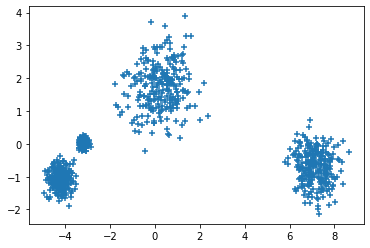

In [28]:
plt.scatter(X_new[:, 0], X_new[:, 1], marker = '+')
plt.show()

In [29]:
# 指定保留的主成分占比
pca = PCA(n_components = 0.9)
pca.fit(x)

print(pca.explained_variance_ratio_)

[0.92597708]


In [31]:
print("降维后的特征数："+ str(pca.n_components_))

降维后的特征数：1


In [32]:
# 指定保留的主成分占比
pca = PCA(n_components = 0.99)
pca.fit(x)

print(pca.explained_variance_ratio_)

[0.92597708 0.06405143]


In [33]:
print("降维后的特征数："+ str(pca.n_components_))

降维后的特征数：2


该示例中，通过保留主要成分，将数据降至二维，可以直观的观察到数据的分布情况。
在进行聚类和分类时，如果能提前观察到样本在空间的大概分布，对于选择合适的算法是很重要的